In [31]:
#load libraries
from IPython.display import Image
import pandas as pd
import math



**Table containing all the activities I plan to do in the city**


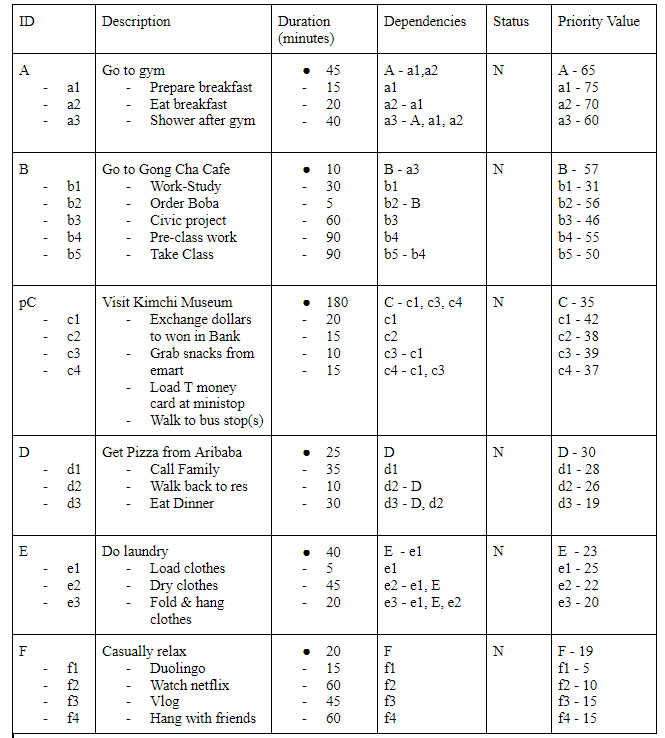

In [32]:
Image(filename='Table1.png')

**B. Information storing:**

I will store the tasks in a list, and hardcode their individual priorities, along with other attributes

**C. How the scheduler will work:Priority queue is a well-suited data structure to handle the prioritization of tasks, and how I define and compute the priority value of each task and/or sub-task.**

The scheduler consists of main tasks with uppercase letters for task IDs. Each of the tasks has subtasks with alphanumeric IDs in correspondence to the letter of its respective main task. The duration column shows how long each task or subtask takes. In the Dependencies column, I indicate each task (or sub-task) and its dependencies if any exist. I assign different priorities to individual subtasks based on how I prioritize them individually as well as in consideration of their dependencies. For example, I value taking class more than all other activities in the day, because I do not want to do make-up work for it, and also since it is at a fixed time of the day. However, since I need to do pre-class work before taking the class, I assign a higher priority to the pre-class work sub-task. Additionally, since the class time is fixed for later in the day (noon), I prefer to go to the gym and have breakfast earlier before the class, which is why I assign a much higher priority to my morning activities. I also give a relatively high priority to visiting the Kimchi Museum since I intend to go on that specific day after classes and before it gets dark. As opposed to using a queue to schedule my tasks for the day on a first come first served basis, a priority queue seemed more ideal as it would take into account the dependencies and the priorities I assigned each task, which can be viewed as the weight I attach to each task when looking at it in terms of utility. Here, the priorities I assign each task will serve as its weight. In sum, I prioritize tasks based on urgency, dependencies, and their value to me. 


**The activity scheduler receives the list of tasks above as input and returns a schedule for me to follow**

In [33]:
#[Heaps and Heapsort]
# I added a few changes to accomodate priorities
class MaxHeapq:
    """ 
    A class that implements properties and methods 
		that support a max priority queue data structure

		Attributes
	  ----------
	  heap : arr
	      A Python list where key values in the max heap are stored
	  heap_size: int
	      An integer counter of the number of keys present in the max heap
	  """  

    def __init__(self):    
        """
        Parameters
        ----------
        None
        """    
        self.heap       = []
        self.heap_size  = 0
        
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node

        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node

        """

        return 2 * i + 2
		
    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node

        """

        return (i - 1)//2

    def maxk(self):     
        """
        Returns the highest key in the priority queue. 
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the highest key in the priority queue

        """
        return self.heap[0]     
    
  
    def heappush(self, key):  
        """
        Insert a key into a priority queue 
        
        Parameters
        ----------
        key: int
            The key value to be inserted

        Returns
        ----------
        None
        """
        #append a dummy task in form of a float such that no task will have a lower priority than the dummy task
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
        
    def increase_key(self, i, key): 
        """
        Modifies the value of a key in a max priority queue
        with a higher value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        #since we are using priority values to add values into the priority queue, add compare the specific attribute of 
        #each task ie (self.priority)
        if key.priority < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        # include (self.priority) for all comparisons 
        while i > 0 and self.heap[self.parent(i)].priority < self.heap[i].priority:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
       
    def heapify(self, i):
        """
        Creates a max heap from the index given
        
        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapify

        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l].priority>heap[i].priority:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r].priority > heap[largest].priority:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self):
        """
        returns the larest key in the max priority queue
        and remove it from the max priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the max value in the heap that is extracted
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk
    
#my_heap = MaxHeapq()

In [34]:
class Task:
    """
    - id: Task Id   
    - description: Short description of the task   
    - duration: Duration in minutes   
    - priority: Priority level of a task (ranging from 0 to 100)   
    - status: Current status of the task:       
   
    """
    #Initializes an instance of the Task class
    def __init__(self,task_id,description,duration,dependencies,priority, status="N"):
        self.id= task_id
        self.description=description
        self.duration=duration
        self.dependencies=dependencies
        self.priority = priority
        self.status=status

     #add the priority attribute   
    def __repr__(self):
        return f"{self.description} - id: {self.id}\n \tDuration:{self.duration}\n\tDepends on: {self.dependencies}\n\tStatus: {self.status}\n\tWith priority value: {self.priority}"

    def __lt__(self, other):
        return self.priority < other.priority 
    


In [35]:
#create a class to schedule the tasks (objects we'll create)
#Heaps and Priority Queues
class TaskScheduler:
    """
    A Simple Daily Task Scheduler Using Priority Queues
    """
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    def __init__(self, tasks):
        self.tasks = tasks
        #since we are no longer using the heapq module, we'll use the Maxheapq class to construct our priority queue
        self.priority_queue = MaxHeapq()
        
    def print_self(self):
        print('My Activities for the Day :)')
        for t in self.tasks:
            print(t)            
            
    def remove_dependency(self, task_id):
        """
        Input: list of tasks and task_id of the task just completed
        Output: lists of tasks with t_id removed
        """
        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)           
            
    def get_tasks_ready(self):
        """ 
        Implements step 1 of the scheduler
        Input: list of tasks
        Output: list of tasks that are ready to execute (i.e. tasks with no pendending task dependencies)
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED and not task.dependencies: # If task has no dependencies and is not yet in queue
                task.status = self.IN_PRIORITY_QUEUE # Change status of the task
                ######## Push task into the priority queue (1line of code required)

                ####### use the heappush method you defined in the MaxHeapq class
                self.priority_queue.heappush(task)

    
    def check_unscheduled_tasks(self):
        """
        Input: list of tasks 
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for task in tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
    
    def run_task_scheduler(self, starting_time = 480):
        current_time = starting_time
        while self.check_unscheduled_tasks() or self.priority_queue.heap_size != 0:
            #STEPs 1 and 2: Extract tasks ready to execute (those without dependencies) and push them into the priority queue
            self.get_tasks_ready()
             #print(self.priority_queue)
             #print(self.priority_queue.heap)

            if self.priority_queue.heap_size > 0 :  #STEP 3: Check for tasks in the priority queue.      
                # STEP 4: get the tasks on top of the priority queue 
                #pop tasks from the priority queue using the heappop method defined in the MaxHeapq class
                task = self.priority_queue.heappop()
                print(task)
                
                #self.priority_queue.heapify(0)
                #self.priority_queue.heappop()


                print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} with priority {task.priority} that takes {task.duration} mins")
                current_time += task.duration            
                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                ####### if the task is completed, it cannot be a dependency on other tasks, so remove it from the dependency list (1 line of code required)
                self.remove_dependency(task.id)
                task.status = self.COMPLETED
        total_time = current_time - starting_time             
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")

In [36]:
#create a list of tasks, as inputs to run through the scheduler
#arrange them in order of how you defined attributes for any instance
tasks =[ Task('A', 'Go to gym', 45, ['a1','a2'], 65), Task('a1', 'Prepare breakfast', 15, [], 75), 
         Task('a2', 'Eat Breakfast', 20, ['a1'], 70), Task('a3', 'Shower after workout', 40, ['A','a1','a2'], 60),
    
          Task('B', 'Go to Gong Cha Cafe', 15, ['a3'], 57), Task('b1', 'Work Study', 30, [], 31), 
          Task('b2', 'Order Boba', 5, ['B'], 56), Task('b3', 'Civic project', 60, [], 46), 
          Task('b4', 'Pre - class work', 90, [], 55), Task('b5', 'Take Class', 90, ['b4'], 50),

          Task('C', 'Visit Kimchi Museum', 180, ['c1','c3','c4'], 35), Task('c1', 'Exchange dollars to won in Bank', 42, [], 20), 
          Task('c2', 'Grab snacks from emart', 15, [], 38), Task('c3', 'Load T money card at ministop', 10, ['c1'], 39), 
          Task('c4', 'Walk to bus stop(s)', 15, ['c1','c3'], 37),
    
          Task('D', 'Get Pizza from Aribaba', 25, [], 30), Task('d1', 'Call Family', 35, [], 28), 
          Task('d2', 'Walk back to res', 10, ['D'], 26), Task('d3', 'Eat Dinner', 30, ['D','d2'], 19),
    
          Task('E', 'Do laundry', 40, ['e1'],  23), Task('e1','Load clothes', 5, [],  25), 
          Task('e2', 'Dry clothes', 45, ['e1','E'], 22), Task('e3', 'Fold & hang clothes', 20, ['e1','E','e2'], 20),
    
          Task('F', 'Casually relax', 20, [], 19), Task('f1', 'Duolingo', 15, [], 5), 
          Task('f2', 'Watch netflix', 60, [],  10), Task('f3', 'Vlog', 45, [], 15), 
          Task('f4', 'Hang with friends', 60, [], 15)
       ]
    

In [37]:
task_scheduler = TaskScheduler(tasks)

# print the scheduler's input 
task_scheduler.print_self()



My Activities for the Day :)
Go to gym - id: A
 	Duration:45
	Depends on: ['a1', 'a2']
	Status: N
	With priority value: 65
Prepare breakfast - id: a1
 	Duration:15
	Depends on: []
	Status: N
	With priority value: 75
Eat Breakfast - id: a2
 	Duration:20
	Depends on: ['a1']
	Status: N
	With priority value: 70
Shower after workout - id: a3
 	Duration:40
	Depends on: ['A', 'a1', 'a2']
	Status: N
	With priority value: 60
Go to Gong Cha Cafe - id: B
 	Duration:15
	Depends on: ['a3']
	Status: N
	With priority value: 57
Work Study - id: b1
 	Duration:30
	Depends on: []
	Status: N
	With priority value: 31
Order Boba - id: b2
 	Duration:5
	Depends on: ['B']
	Status: N
	With priority value: 56
Civic project - id: b3
 	Duration:60
	Depends on: []
	Status: N
	With priority value: 46
Pre - class work - id: b4
 	Duration:90
	Depends on: []
	Status: N
	With priority value: 55
Take Class - id: b5
 	Duration:90
	Depends on: ['b4']
	Status: N
	With priority value: 50
Visit Kimchi Museum - id: C
 	Duratio

In [38]:
#run the tasks through the scheduler
task_scheduler.run_task_scheduler()


Prepare breakfast - id: a1
 	Duration:15
	Depends on: []
	Status: I
	With priority value: 75
⏰Simple Scheduler at time 8h00 started executing task a1 with priority 75 that takes 15 mins
✅ Completed Task a1 - 'Prepare breakfast' at time 8h15

Eat Breakfast - id: a2
 	Duration:20
	Depends on: []
	Status: I
	With priority value: 70
⏰Simple Scheduler at time 8h15 started executing task a2 with priority 70 that takes 20 mins
✅ Completed Task a2 - 'Eat Breakfast' at time 8h35

Go to gym - id: A
 	Duration:45
	Depends on: []
	Status: I
	With priority value: 65
⏰Simple Scheduler at time 8h35 started executing task A with priority 65 that takes 45 mins
✅ Completed Task A - 'Go to gym' at time 9h20

Shower after workout - id: a3
 	Duration:40
	Depends on: []
	Status: I
	With priority value: 60
⏰Simple Scheduler at time 9h20 started executing task a3 with priority 60 that takes 40 mins
✅ Completed Task a3 - 'Shower after workout' at time 10h00

Go to Gong Cha Cafe - id: B
 	Duration:15
	Depends o

**B. How the scheduler prioritizes tasks based on their priority value.**

From the Output, the task scheduler begins by prioritizing tasks without dependencies as instructed. More specifically, since I assign the highest priority to task with id 'a1', it executes this first even though it was not the first task in the input list. The same with other tasks as seen in their order of execution. The MaxHeapq class pushes tasks into the priority queue based on their assigned priority values, which is exactly how the program is designed to work.

**Modification of  algorithmic approach to now handle multi-tasks - while some tasks can be multi-tasked, others may
demand your full attention.**

In order to incorporate multitasking in my activity planner, I'll define a similar Task class, with a boolean variable called multitasking that evaluates to True if the task can be multitasked, that is, when the task can be carried out while performing a different task for example hanging out with friends while doing laundry. After loading clothes into the dryer, I can hang out with my friends as the clothes dry.I would define different methods from the ones in in question 2. Or evaluates to False when the task requires my full attention and I cannot do anything else while executing that task for example taking class, or working out at the gym, or taking a shower. 

In this algorithm, I would need to separate tasks that can be multitasked from the ones that cannot. I would then need to keep track of dependencies such that once a task is popped, I can update the dependencies and status.I also need to define methods to update the priorities of tasks based on dependencies, and for this I may need to reassign new relative priorities. I also need to keep track of time taken to perform all tasks. I can use the same method to update time and dependency, if any, since they are affected by the execution of each task.

For formality, I opt to prioritize multitaskable tasks that take a longer time compared to those whose durations are shorter. I would give high priorities to tasks without dependencies. I would like before, implement Maxheapq to push into and pop tasks from the priority queue, all the while updating their status.

**B. Constraints in the scheduling process are handled by a priority queue.**

Scheduling becomes tedious when multitasking is involved, which necessitated the need to reassign priority values based on dependencies, as well as duration. This was facilitated by the priority queue, which pushes tasks with higher priorities into the scheduler, and once they are executed we move on to the next task(s) in the aqueued.

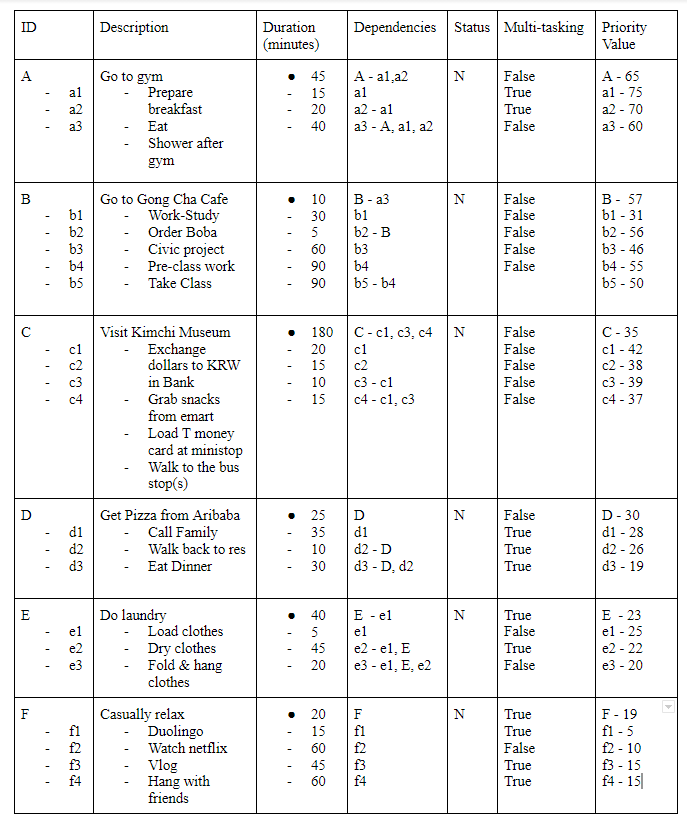

In [24]:
Image(filename='Table2.png')

In [39]:
# use same MaxHeap class as before to prioritize tasks based on priorities
class MaxHeapq:
    """ 
    A class that implements properties and methods 
		that support a max priority queue data structure

		Attributes
	  ----------
	  heap : arr
	      A Python list where key values in the max heap are stored
	  heap_size: int
	      An integer counter of the number of keys present in the max heap
	  """  

    def __init__(self):    
        """
        Parameters
        ----------
        None
        """    
        self.heap       = []
        self.heap_size  = 0
        
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node

        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node

        """

        return 2 * i + 2
		
    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node

        """

        return (i - 1)//2

    def maxk(self):     
        """
        Returns the highest key in the priority queue. 
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the highest key in the priority queue

        """
        return self.heap[0]     
    
  
    def heappush(self, key):  
        """
        Insert a key into a priority queue 
        
        Parameters
        ----------
        key: int
            The key value to be inserted

        Returns
        ----------
        None
        """
        #append a dummy task in form of a float such that no task will have a lower priority than the dummy task
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
        
    def increase_key(self, i, key): 
        """
        Modifies the value of a key in a max priority queue
        with a higher value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        #since we are using priority values to add values into the priority queue, add compare the specific attribute of 
        #each task ie (self.priority)
        if key.priority < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        # include (self.priority) for all comparisons 
        while i > 0 and self.heap[self.parent(i)].priority < self.heap[i].priority:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
       
    def heapify(self, i):
        """
        Creates a max heap from the index given
        
        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapify

        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l].priority>heap[i].priority:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r].priority > heap[largest].priority:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self):
        """
        returns the larest key in the max priority queue
        and remove it from the max priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the max value in the heap that is extracted
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk
    
#my_heap = MaxHeapq()

In [40]:
class Task:
    """
    - id: Task Id   
    - description: Short description of the task   
    - duration: Duration in minutes   
    - multitask: Boolean variable to check if tasks can be multi-tasked or not
    - status: Current status of the task:   
    - priority: Priority level of a task (ranging from 0 to 100)   

   
    """
    #Initializes an instance of Task using init method
    #from code in question two, add the multitask attribute    
    def __init__(self, task_id, description, duration, multitask, dependencies, status, priority):
                
        self.task_id = task_id
        self.description = description
        self.duration = duration
        self.multitask = multitask
        self.dependencies = dependencies
        self.status = status
        self.priority = priority
              
    # taking into account multitasked tasks, check the duration for each task
    def task_update_time_and_dependency(self, tasks):
        
        '''
        Run tasks to update dependecies after each task is executed.
        The method finds the task Ids of tasks popped for dependency updating.
        '''
        # inititalize time tracker to 0
        time = 0
        # inititalize dependency tracker to 0
        dependency = 0
        
        # Run the non-multi-tasking activities that require your full attention
        if (self.multitask == False) or (len(tasks.heap) <= 1):
            # increament time by its duration
            time += self.duration
            
            # update task status after execution and store its id
            self.status = 'COMPLETED'
            print(f'Completed: {self.description}.')
            
            dependency = self.task_id
            
            # pop from queue
            tasks.heappop()
        
        # Now run multitasks
        elif self.multitask == True:
            
            if len(tasks.heap) > 1:
            
                # find other multitasks
                for multi in tasks.heap[1:]:
                    
                    # if the task in the heap can be multitasked, store the task
                    if multi.multitask == True:
                        break
                        
            #for ease, determine which one takes a shorter time, and subtract its duration from the multitasked duration
            if self.duration < multi.duration:
                multi.duration -= self.duration
                
                # increament the time tracker by the shorter duration after the comparison
                time += self.duration
                
                # update task status to complete and the one for multitasking to in progress
                self.status = 'COMPLETED'
                multi.status = 'IN-PROGRESS'
                
                print(f'Multitask: {multi.description} has {multi.duration} minutes left to finalize.')
                print(f'Completed: {self.description}.')
                
                #update dependency and pop first item in queue
                dependency = self.task_id
                
                tasks.heappop()
            
            # do the ones that take the same amount of time together
            elif self.duration == multi.duration:
                
                time += self.duration
                
                # update status for both as before
                self.status = 'COMPLETED'
                multi.status = 'COMPLETED'
                
                print(f'Multitask completion: {self.description}.')
                print(f'Multitask completion: {multi.description}.')
                
                #update dependency
                dependency = [self.task_id, multi.task_id]
                
                # pop root node, set priority of other to very high, heapify, and then pop again
                tasks.heappop()
                
                multi.priority = multi.priority * 200
                tasks.heapify(0)
                
                
                # pop next multitask
                tasks.heappop()
                
            # compare priorities
            else:
                
                self.duration -= multi.duration
                
                time += multi.duration
                
                # update status. This time multi is completed, and other is in progress
                multi.status = 'COMPLETED'
                self.status = 'IN-PROGRESS'
                
                print(f'Multitask: {self.description} has {self.duration} minutes left to finalize.')
                print(f'Completed: {multi.description}.')
                
                # increase multi task's priority to heapify 
                multi.priority = multi.priority * 200
                tasks.heapify(0)
                
                # update dependency and pop task
                dependency = multi.task_id
                tasks.heappop()
                
        
        return time, dependency
    
    # pass list of tasks to reassign dependencies
    
    def update_priority(self, tasks):
        
        '''
        update priorities according to dependencies, and the strategy we use.
        '''
        # reset all priorities to 1
        for i in range(tasks.heap_size):
            tasks.heap[i].priority = 1
        
        # update priorities based upon dependency
        for i in range(tasks.heap_size):
            #set arbitrary values for priorities such that those with many dependencies have a low priority
            if len(tasks.heap[i].dependencies) == 3:
                tasks.heap[i].priority = tasks.heap[i].priority * 10
            
            if len(tasks.heap[i].dependencies) == 2:
                tasks.heap[i].priority = tasks.heap[i].priority * 30
                
            elif len(tasks.heap[i].dependencies) == 1:
                tasks.heap[i].priority = tasks.heap[i].priority * 50
                
            elif len(tasks.heap[i].dependencies) == 0:
                tasks.heap[i].priority = tasks.heap[i].priority * 70
    
          
        # prioritise longer duration multitasked tasks 
        for i in range(tasks.heap_size):
            
            # check if multitasker
            if tasks.heap[i].multitask == True:
                # times priority by arbitrary numbers
                tasks.heap[i].priority = int((tasks.heap[i].priority) * tasks.heap[i].duration)
                return tasks
                
       
    
    # update dependencies after poping items from priority queue 
    def dependency_update(self, tasks, dependency):
        
        # iterate through all tasks
        for i in tasks.heap:
            
            # if the taskID (taken from dependency) is a dependency for another task, remove it
            if dependency in i.dependencies:
                i.dependencies.remove(dependency)
        
        return tasks



In [41]:
#the original list of tasks, but including the multitasking attribute
tasks =[ Task('A', 'Go to gym', 45, False, ['a1','a2'], "N", 65), Task('a1', 'Prepare breakfast', 15, True, [],"N", 75), 
         Task('a2', 'Eat Breakfast', 20, True, ['a1'], "N", 70), Task('a3', 'Shower after workout', 40, False, ['A','a1','a2'], "N", 60),
    
          Task('B', 'Go to Gong Cha Cafe', 15, False, ['a3'], "N", 57), Task('b1', 'Work Study', 30, False, [], "N", 31), 
          Task('b2', 'Order Boba', 5, False, ['B'], "N",  56), Task('b3', 'Civic project', 60, False, [], "N",  46), 
          Task('b4', 'Pre - class work', 90, False, [], "N",  55), Task('b5', 'Take Class', 90, False, ['b4'], "N",  50),
        
          Task('C', 'Visit Kimchi Museum', 180, False, ['c1','c3','c4'], "N", 35), Task('c1', 'Exchange dollars to won in Bank', 42, False, [], "N", 20), 
          Task('c2', 'Grab snacks from emart', 15, False, [], "N", 38), Task('c3', 'Load T money card at ministop', 10, False, ['c1'], "N", 39), 
          Task('c4', 'Walk to bus stop(s)', 15, False, ['c1','c3'], "N", 37),
        
          Task('D', 'Get Pizza from Aribaba', 25, False, [], "N", 30), Task('d1', 'Call Family', 35, True, [],"N", 28), 
          Task('d2', 'Walk back to res', 10, True, ['D'],"N", 26), Task('d3', 'Eat Dinner', 30, True, ['D','d2'], "N", 19),
    
    
          Task('E', 'Do laundry', 40, True, ['e1'], "N", 23), Task('e1','Load clothes', 5, False, [], "N", 25), 
          Task('e2', 'Dry clothes', 45, True, ['e1','E'], "N", 22), Task('e3', 'Fold & hang clothes', 20, False, ['e1','E','e2'], "N", 20),
    
          Task('F', 'Casually relax', 20, True, [], "N", 19), Task('f1', 'Duolingo', 15, True, [], "N", 5), 
          Task('f2', 'Watch netflix', 60, False, [], "N", 10), Task('f3', 'Vlog', 45, True, [], "N", 15), 
          Task('f4', 'Hang with friends', 60, True, [], "N", 15) 
      
       ]


In [42]:
#initialize heap by creating a priority queue to add tasks and pop as we execute and update dependencies, time and status
priority_queue = MaxHeapq()

# push tasks into priority_queue
for task in tasks:
    priority_queue.heappush(task)
    
#heapify the priority queue
Task.update_priority(priority_queue.heap[0], priority_queue)
priority_queue.heapify(0)

# keep track of times and tasks
time_tracklist = []

# number of tasks
total = 1

# initialize terminating condition
finished = True

# execute tasks, printing name of executed task, amount of time taken per task and sum of time
while finished == True:
    
    print('---')
    
    # task number
    
    print(f'Task {total}')
    
    # keep track of time and store durations
    time, dependency = Task.task_update_time_and_dependency(priority_queue.heap[0], priority_queue)
    time_tracklist.append(time)

    print(f'Task took: {time} minutes.')

    print(f'Time spent so far: {sum(time_tracklist)} minutes.')
    
    if len(priority_queue.heap) != 0:
        # update dependencies
        Task.dependency_update(priority_queue.heap[0], priority_queue, dependency)

        # update priorities
        Task.update_priority(priority_queue.heap[0], priority_queue)

        # heapify
        priority_queue.heapify(0)
    
    # Terminating condition: when there is no task left unexecuted in priority queue
    if len(priority_queue.heap) == 0:
        finished = False
    
    # return total tasks executed
    total += 1
    

print('----')    
print(f"🏁 Completed all planned tasks in {sum(time_tracklist)//60}h{sum(time_tracklist)%60:02d}min")


---
Task 1
Multitask: Eat Breakfast has 5 minutes left to finalize.
Completed: Prepare breakfast.
Task took: 15 minutes.
Time spent so far: 15 minutes.
---
Task 2
Multitask: Hang with friends has 55 minutes left to finalize.
Completed: Eat Breakfast.
Task took: 5 minutes.
Time spent so far: 20 minutes.
---
Task 3
Multitask: Hang with friends has 10 minutes left to finalize.
Completed: Vlog.
Task took: 45 minutes.
Time spent so far: 65 minutes.
---
Task 4
Multitask: Call Family has 25 minutes left to finalize.
Completed: Hang with friends.
Task took: 10 minutes.
Time spent so far: 75 minutes.
---
Task 5
Multitask: Call Family has 10 minutes left to finalize.
Completed: Duolingo.
Task took: 15 minutes.
Time spent so far: 90 minutes.
---
Task 6
Multitask: Casually relax has 10 minutes left to finalize.
Completed: Call Family.
Task took: 10 minutes.
Time spent so far: 100 minutes.
---
Task 7
Completed: Go to gym.
Task took: 45 minutes.
Time spent so far: 145 minutes.
---
Task 8
Completed: 

**Algorithm Analysis.**

Initially, my algorithm took 18 hours 2 minutes. After accomodating for mulititasks, the total time taken decreases significantly, as outputed in the last line of both algorithms. This increased the efficiency for the program, as well as for me, while carrying out the tasks. I would much rather use this code to plan out my day's activities as compared to deciding on tasks on the spot as the scheduler, especially the one with the multitasking attribute, helps me save on time as opposed to if I was doing all tasks one at a time. Imagine me just sitting to wait for my clothes to finish washing so as to load them into the dryer, when instead I could be utilizing those 40 minutes to do something useful to tick off my to do list for example watching my favorite show, or vlogging and so on. When possible, it is ideal and rational to kill two birds with one stone.

I use max heap to add and pop tasks from my priority queue. This is computationally more efficient than most algorithms as a heap of n elements based on a complete binary tree, takes theta (lg n) which represents the height of the tree. Basic operations on the heap will thus run proportionally to the height of the tree, taking O(lg n) time. heapify procedure, runs in  O(lg n) time, while maintaining the max-heap property. Building the maxheap ideally runs in linear time, and the heapsort overall, runs in  O(n lg n) time. It also sorts an array in place, not requiring extra memory, hence more efficient. I will definitely start using my schedular to plan my to-do lists


Suggestion to improve my algorithm:

I believe a more efficient and organized way to design the algorithm would be to use dictionaries, as I demonstrate below. For this, I would have IDs as keys and each of my class (Task) objects as values. I would store the IDs in variables to make it even easier to reference them, as opposed to using strings. I would then form a tuple with Priority values and task variables I created (instances), such that for (65, A), 65 is the priority value for task with id 'A' and  A is the instance of task with ID 'A'. I would then apply MaxHeapq, to sort tasks based on the first element of my tuple(the priority values), and the rest of the information about the task is heaped along with it. This way, I can easily modify information about task objects with few lines of code.


In [ ]:
#create dictionary with IDs as key and instances as values pointed by keys
tasks_dict = { 'A': Task('A', 'Go to gym', 45, ['a1','a2'], 65), 'a1': Task('a1', 'Prepare breakfast', 15, [], 75), 
         'a2':Task('a2', 'Eat Breakfast', 20, ['a1'], 70), 'a3': Task('a3', 'Shower after workout', 40, ['A','a1','a2'], 60),
    
         'B': Task('B', 'Go to Gong Cha Cafe', 15, ['a3'], 57), 'b1': Task('b1', 'Work Study', 30, ['a1'], 31), 
         'b2': Task('b2', 'Order Boba', 5, ['B'], 56), 'b3': Task('b3', 'Civic project', 60, [], 46), 
         'b4': Task('b4', 'Pre - class work', 90, [], 55), 'b5': Task('b5', 'Take Class', 90, ['b4'], 50),

         'C': Task('C', 'Visit Kimchi Museum', 180, ['c1','c3','c4'], 35), 'c1': Task('c1', 'Exchange dollars to won in Bank', 42, [], 20), 
         'c2': Task('c2', 'Grab snacks from emart', 15, [], 38), 'c3': Task('c3', 'Load T money card at ministop', 10, ['c1'], 39), 
         'c4': Task('c4', 'Walk to bus stop(s)', 15, ['c1','c3'], 37),
    
         'D': Task('D', 'Get Pizza from Aribaba', 25, [], 30), 'd1': Task('d1', 'Call Family', 35, [], 28), 
         'd2': Task('d2', 'Walk back to res', 10, ['D'], 26), 'd3': Task('d3', 'Eat Dinner', 30, ['D','d2'], 19),
    
         'E': Task('E', 'Do laundry', 40, ['e1'],  23), 'e1': Task('e1', 'Load clothes', 5, [],  25), 
         'e2': Task('e2', 'Dry clothes', 45, ['e1','E'], 22), 'e3': Task('e3', 'Fold & hang clothes', 20, ['e1','E','e2'], 20),
    
         'F': Task('F', 'Casually relax', 20, [], 19), 'f1': Task('f1', 'Duolingo', 15, [], 5), 
         'f2': Task('f2', 'Watch netflix', 60, [],  10), 'f3': Task('f3', 'Vlog', 45, [], 15), 
         'f4': Task('f4', 'Hang with friends', 60, [], 15)
        }
    

In [ ]:
# insert each key into the priority queue

task_priority_list = [65, 75, 70 ,60, 57, 31, 56, 46, 55 ,50 , 35, 42, 38, 39, 37, 30, 28, 26, 19, 23, 
                              25, 22, 20, 19, 5, 10, 15, 15]
id_list = ['A','a1','a2','a3','B','b1','b2','b3','b4','b5','C','c1','c2','c3','c4','D','d1','d2','d3','E',
                  'e1', 'e2', 'e3', 'F', 'f1', 'f2', 'f3', 'f4']


A = tasks_dict['A']
a1 = tasks_dict['a1']
a2 = tasks_dict['a2']
a3 = tasks_dict['a3']
B = tasks_dict['B']
b1 = tasks_dict['b1']
b2 = tasks_dict['b2']
b3 = tasks_dict['b3']
b4 = tasks_dict['b4']
b5 = tasks_dict['b5']
C = tasks_dict['C']
c1 = tasks_dict['c1']
c2 = tasks_dict['c2']
c3 =tasks_dict['c3']
c4 = tasks_dict['c4']
D = tasks_dict['D']
d1 = tasks_dict['d1']
d2 = tasks_dict['d2']
d3 = tasks_dict['d3']
E = tasks_dict['E']
e1 = tasks_dict['e1']
e2 = tasks_dict['e2']
e3 = tasks_dict['e3']
F = tasks_dict['F']
f1 = tasks_dict['f1']
f2 = tasks_dict['f2']
f3 = tasks_dict['f3']

tasks = [A, a1, a2, a3, B, b1, b2, b3, b4, b5, C, c1, c2, c3, c4, D, d1, d2, d3, E, e1, e2, e3, F, f1, f2, f3]


heap_tuple = list(zip(task_priority_list, tasks))
print(heap_tuple)


    

In [ ]:
print(a1.priority)
print(c3)